In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling 

C:\Users\AKSHAY\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\AKSHAY\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\AKSHAY\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\AKSHAY\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\AKSHAY\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\AKSHAY\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Use

# Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


# EDA

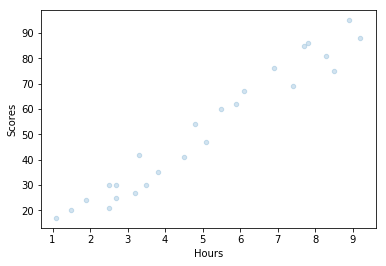

In [5]:
# Pandas scatter plot
df.plot(kind='scatter', x='Hours', y='Scores', alpha=0.2)

In [6]:

pandas_profiling.ProfileReport(df)

Number of variables,2
Number of observations,25
Total Missing (%),0.0%
Total size in memory,480.0 B
Average record size in memory,19.2 B
Numeric,1
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,1


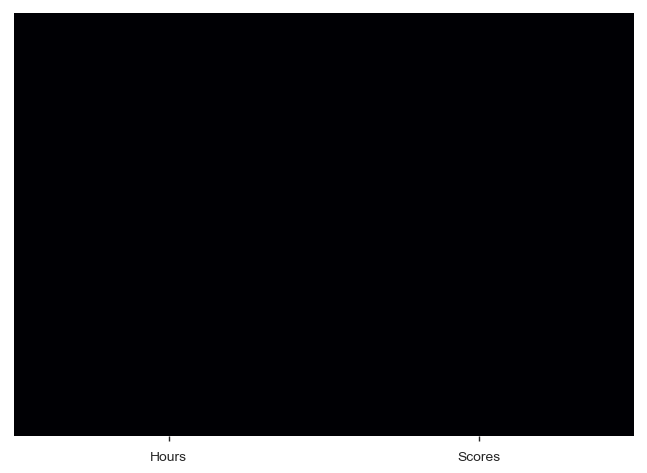

In [7]:
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'magma' ,cbar = False)

In [20]:
# No null values

# Univariate Analysis

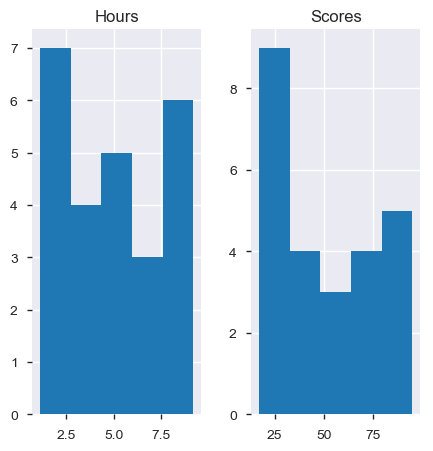

In [8]:
df.hist(bins=5,figsize=(5,5))
plt.show()


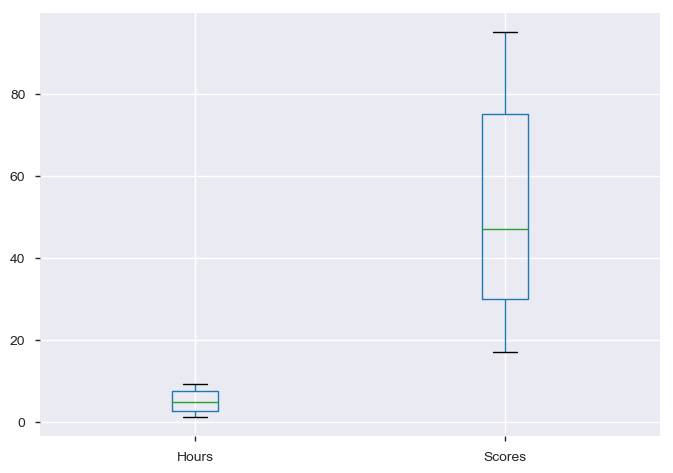

In [9]:
df.boxplot()

C:\Users\AKSHAY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0.2339646665397317     -1.4438326250947935


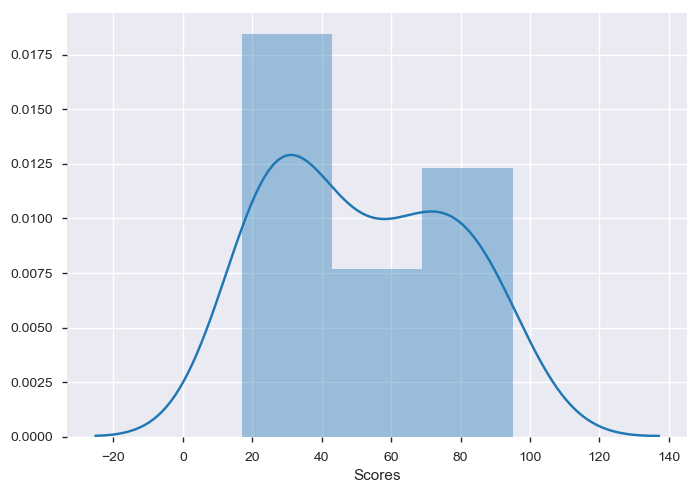

In [10]:
from scipy.stats import skew, kurtosis
sns.distplot(df['Scores']);
print(df["Scores"].skew(),"   ", df["Scores"].kurtosis())

# Bivariate Analysis

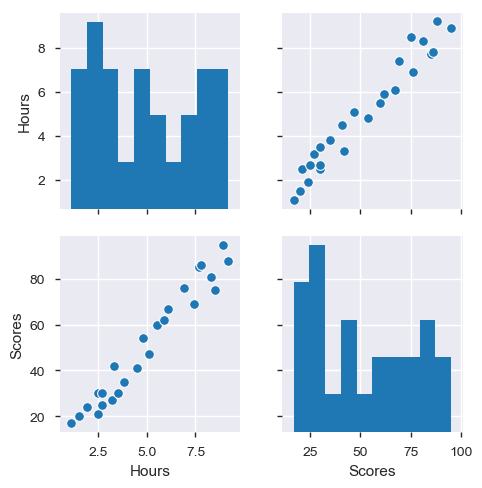

In [11]:
sns.pairplot(df)


# Model Building

In [12]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit (x_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [9.91065648]
Intercept:  2.018160041434683


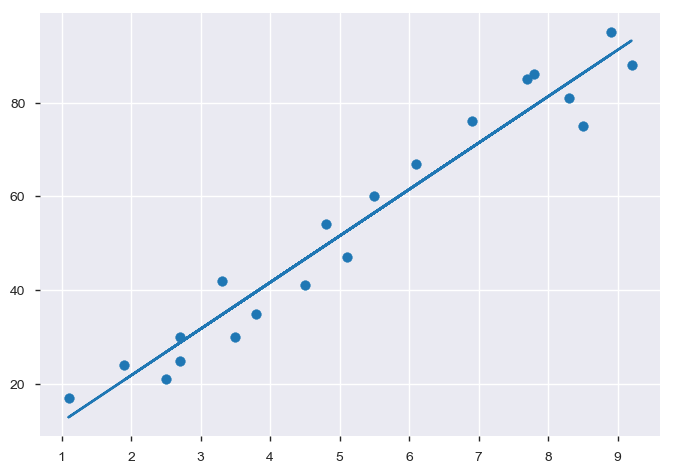

In [14]:
# Plotting the regression line
line = regr.coef_*x_train+regr.intercept_

# Plotting for the test data
plt.scatter(x_train,y_train)
plt.plot(x_train, line);
plt.show()

In [15]:
y_pred=regr.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [16]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


In [18]:
hours = 9.25
own_pred = regr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
